Read your notes of mean,MAD,MAPE,MSE,RMSE

In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose #Splitting the time series into components
from sklearn.metrics import mean_squared_error  #calculating RMSE
from math import sqrt

In [5]:
import os
os.chdir(r'/content/drive/MyDrive/STATSCDAC')

In [6]:
df= pd.read_excel('CDAC_DataBook.xlsx', sheet_name='birth')

<Axes: >

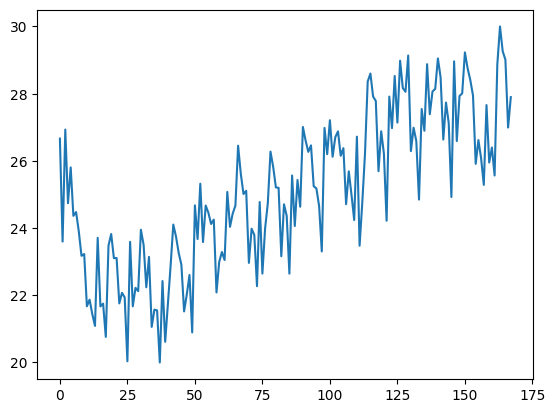

In [7]:
df.BirthRate.plot() #plotting your timeseries

In [8]:
df_train = df.iloc[:144] #splitting dataset, 12yrs to create model
df_test = df.iloc[144:]  #2 years data is used to test the model

#we're manually splitting the dataset because we don't want to change the sequence
#we're consideering last2years data as testing data and the 12 years data as training data.

In [9]:
df_train.shape

(144, 1)

In [10]:
df_test.shape

(24, 1)

<Axes: >

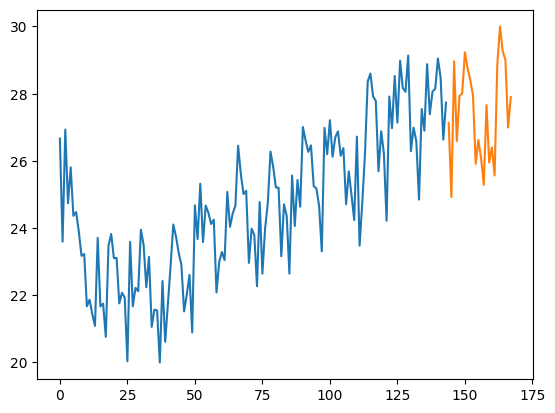

In [11]:
df_train.BirthRate.plot()
df_test.BirthRate.plot()

In [12]:
res = statsmodels.tsa.seasonal.seasonal_decompose(df.BirthRate,period=12)

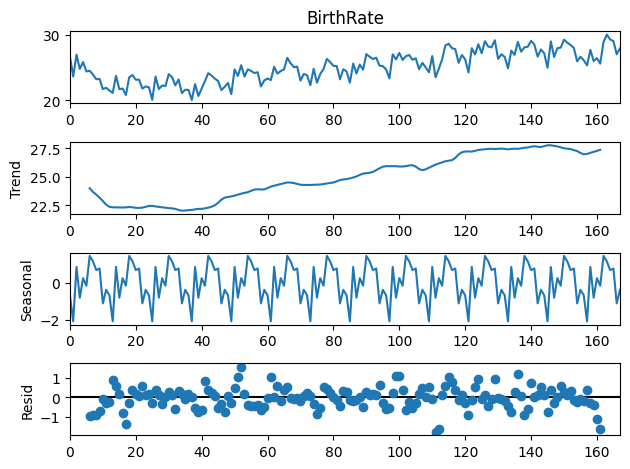

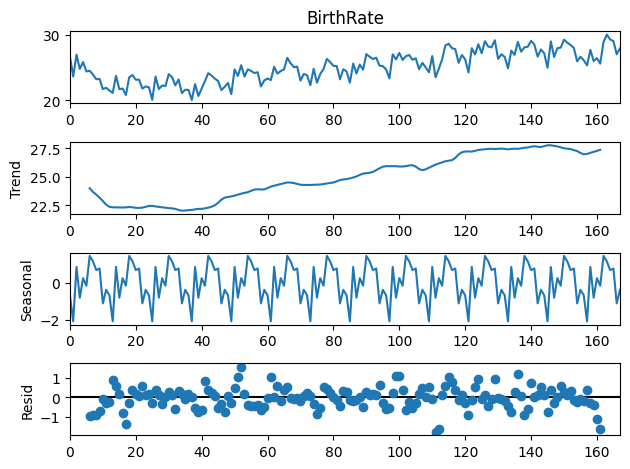

In [13]:
res.plot() #to view the components of time series.

#the first graph is the actual data graph
#2nd graph is the trend
#3rd is seasonal
#4th is residual

**NAIVE METHOD:**

If you want to predict what will happen in the next two years that will be same as last month.

**If you want to predict what will happen in the next years that will be same as last time period**.

the trend for the next two years will be same as the last month.

In [14]:
df_train.tail()

,BirthRate
139,28.141
140,29.048
141,28.484
142,26.634
143,27.735


In [15]:
dd = np.asarray(df_train.BirthRate) #saved as array

In [16]:
y_hat = df_test.copy()   #copied the test data

In [17]:
y_hat['naive'] =  dd[len(dd)-1] #adding forecasted column as naive because the technique used is NAIVE method.

In [18]:
y_hat.head()

,BirthRate,naive
144,27.132,27.735
145,24.924,27.735
146,28.963,27.735
147,26.589,27.735
148,27.931,27.735


In [19]:
y_hat.tail()

,BirthRate,naive
163,30.000,27.735
164,29.261,27.735
165,29.012,27.735
166,26.992,27.735
167,27.897,27.735


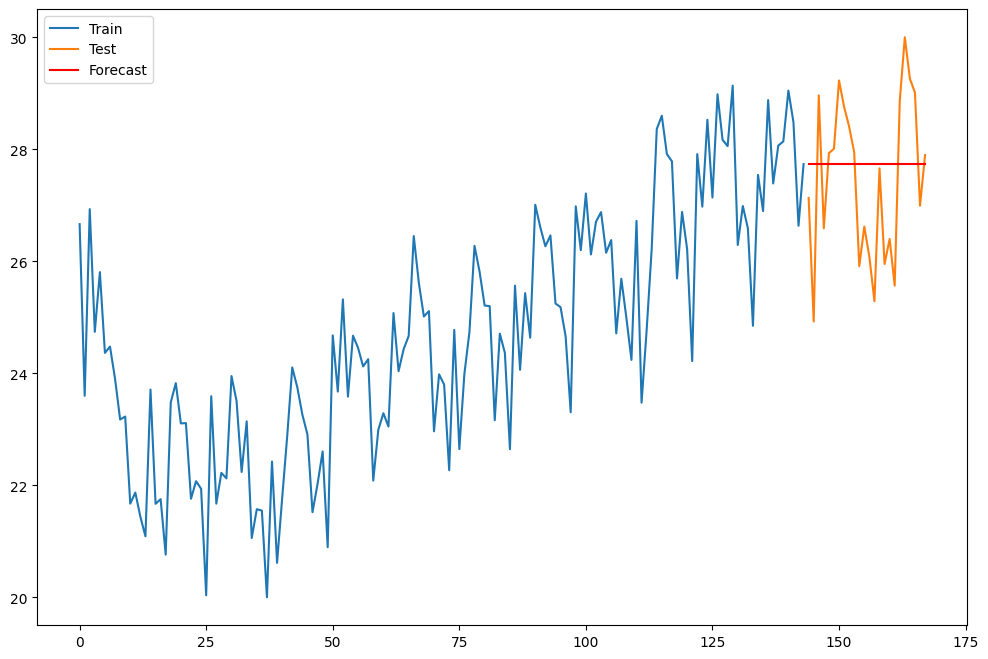

In [21]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.BirthRate,label='Train')
plt.plot(df_test.index,y_hat.BirthRate,label='Test')
plt.plot(y_hat.index,y_hat.naive,label='Forecast',c='r')
plt.legend()

#red line is forecasted value, technique of forecasting weused here is the NAIVE technique.

In [22]:
rms = sqrt(mean_squared_error(df_test.BirthRate, y_hat.naive))
rms

1.4277309211939526

**SIMPLE AVERAGE METHOD:**


the avg of total 144 months (12 years) values will continue for the next two years.

the avg of the input values will continue for the next time period to be predicted.

In [23]:
y_hat_avg = df_test.copy()

In [25]:
y_hat_avg['MeanForecast'] = df_train['BirthRate'].mean()

In [26]:
y_hat_avg.head()

,BirthRate,MeanForecast
144,27.132,24.656833
145,24.924,24.656833
146,28.963,24.656833
147,26.589,24.656833
148,27.931,24.656833


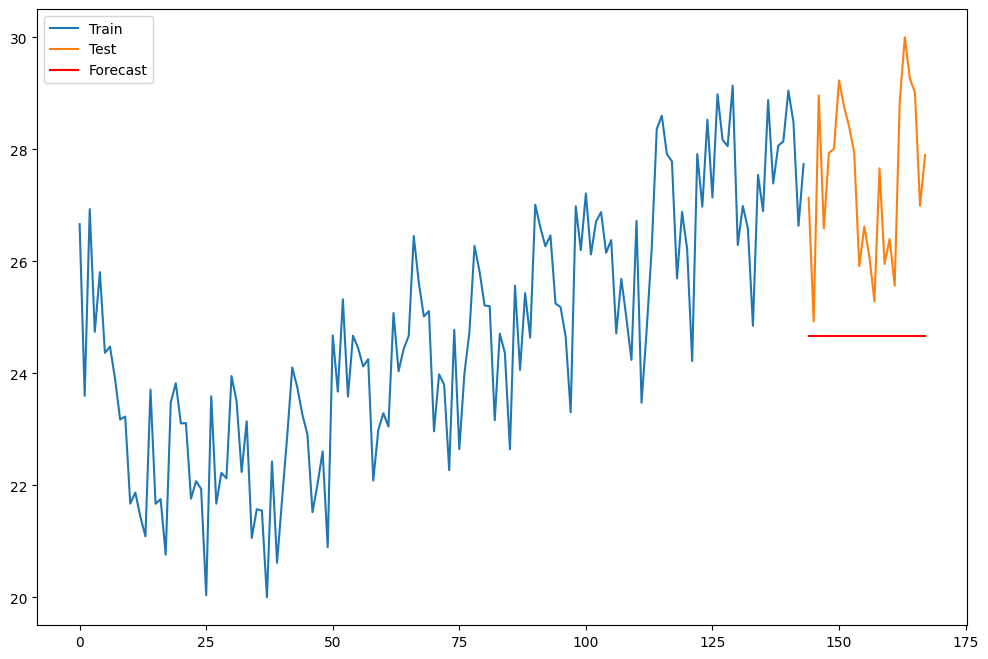

In [27]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.BirthRate,label='Train')
plt.plot(df_test.index,y_hat.BirthRate,label='Test')
plt.plot(y_hat_avg.index,y_hat_avg.MeanForecast,label='Forecast',c='r')
plt.legend()

#forecast here is the predicted values.
#meanforecast is the mean of all the forecast values.

In [28]:
rms = sqrt(mean_squared_error(df_test.BirthRate, y_hat_avg.MeanForecast))
rms

3.147657647627305

**3) MOVING AVERAGE:**

eg: 3 MONTH moving avg = avg of previous 3 months
3 month movig avg of 7th month = avg of 4th,5th,6th months

the time period choosing will depend on the RMSE value.

if rmse of 12 months> rmse of 6months then, 6 month moving avg  is considered.

In [29]:
y_hat_avg['MovAvgForecast'] = df_train['BirthRate'].rolling(12).mean().iloc[-1]

#12 IN rolling is 12 month moving avg.
#here the avg is the avg of 12 months of the 12 th year, because were predicting 13th and 14th year

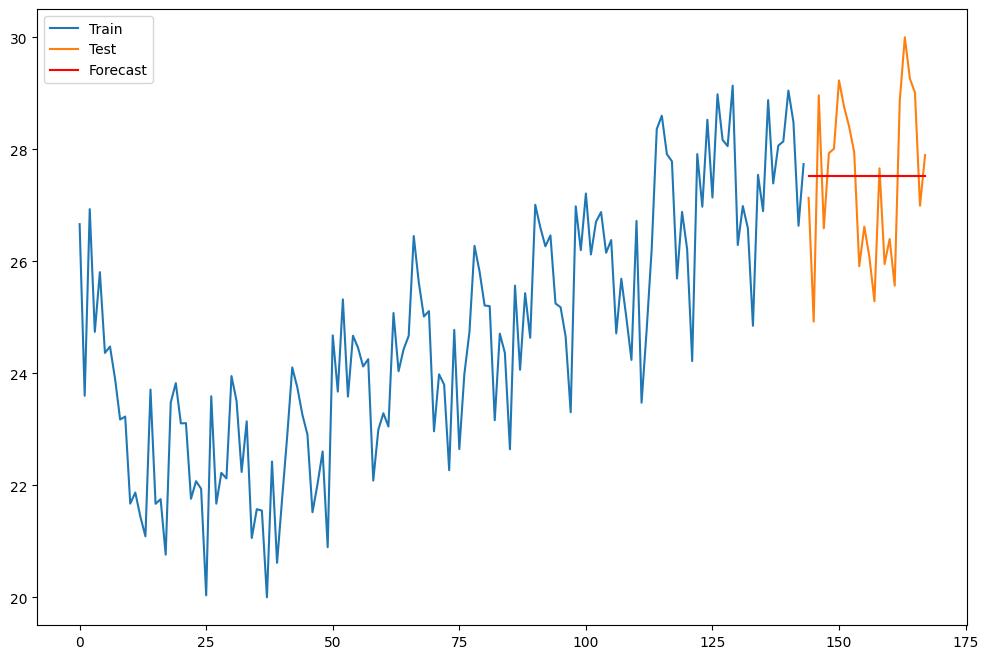

In [54]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.BirthRate,label='Train')
plt.plot(df_test.index,df_test.BirthRate,label='Test')
plt.plot(y_hat_avg.index,y_hat_avg.MovAvgForecast,label='Forecast',c='r')
plt.legend()

#this is wrong graph here, the y_hat_avg is updated one after holtwinters method.

In [32]:
y_hat_avg

,BirthRate,MeanForecast,MovAvgForecast
144,27.132,24.656833,27.520917
145,24.924,24.656833,27.520917
146,28.963,24.656833,27.520917
147,26.589,24.656833,27.520917
148,27.931,24.656833,27.520917
149,28.009,24.656833,27.520917
150,29.229,24.656833,27.520917
151,28.759,24.656833,27.520917
152,28.405,24.656833,27.520917
153,27.945,24.656833,27.520917


In [31]:
rms = sqrt(mean_squared_error(df_test.BirthRate, y_hat_avg.MovAvgForecast))
rms

1.4044810849760687

**WEIGHTED MOVING AVERAGE:**

here, the latest number has the highest weightage, the earlier number will have the least weightage.

1st month will get the least weightage, 12th month have the highest weightage.

we can manually set the weighted avg for different months.

In [33]:
x = df_train['BirthRate'].iloc[-12:]

#extracting last 12 months values

In [34]:
wt_sum = 0
denom = 0
for ctr in range(len(x)):
  wt_sum = wt_sum + x.iloc[ctr]*(ctr+1)
  denom = denom +ctr+1

wt_avg = wt_sum/denom

In [35]:
wt_avg

27.806115384615385

In [36]:
y_hat_avg['WtMovAvgForecast'] = wt_avg

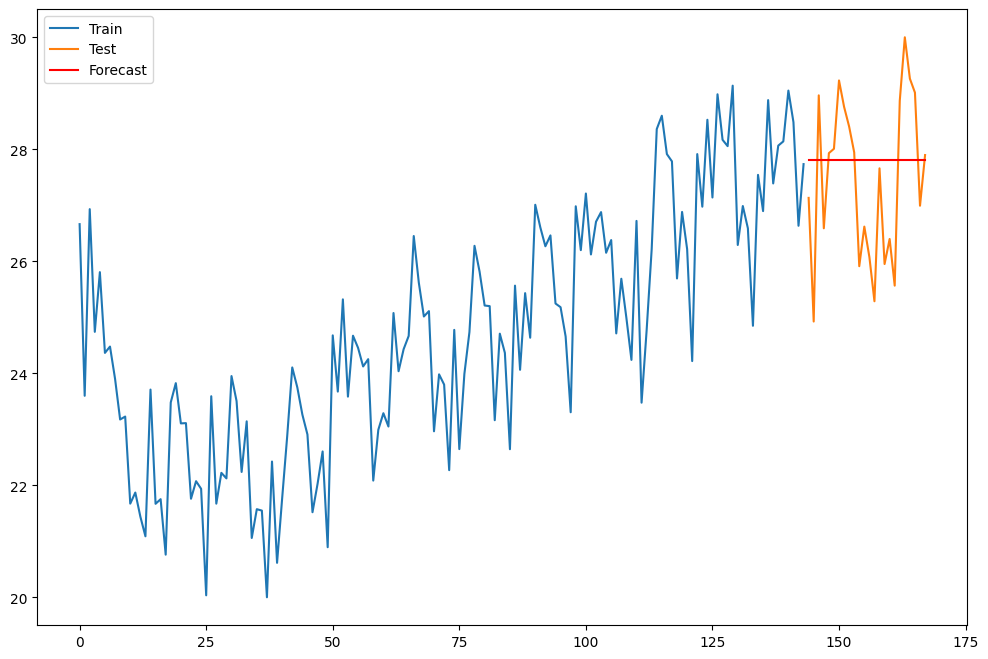

In [37]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.BirthRate,label='Train')
plt.plot(df_test.index,y_hat.BirthRate,label='Test') #here the correct command is df_test.BirthRate
plt.plot(y_hat_avg.index,y_hat_avg.WtMovAvgForecast,label='Forecast',c='r')
plt.legend()

In [38]:
rms = sqrt(mean_squared_error(df_test.BirthRate, y_hat_avg.WtMovAvgForecast))
rms

1.442418630947116

In [39]:
y_hat_avg

,BirthRate,MeanForecast,MovAvgForecast,WtMovAvgForecast
144,27.132,24.656833,27.520917,27.806115
145,24.924,24.656833,27.520917,27.806115
146,28.963,24.656833,27.520917,27.806115
147,26.589,24.656833,27.520917,27.806115
148,27.931,24.656833,27.520917,27.806115
149,28.009,24.656833,27.520917,27.806115
150,29.229,24.656833,27.520917,27.806115
151,28.759,24.656833,27.520917,27.806115
152,28.405,24.656833,27.520917,27.806115
153,27.945,24.656833,27.520917,27.806115


**EXONENTIAL SMOOTHING:**

In [40]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

**SIMPLE EXPONENTIAL SMOOTHING (SES):**




In [41]:
mod1 = SimpleExpSmoothing(np.asarray(df_train.BirthRate)).fit(smoothing_level=0.8)

In [42]:
y_hat_avg['SES'] = mod1.forecast(len(df_test))

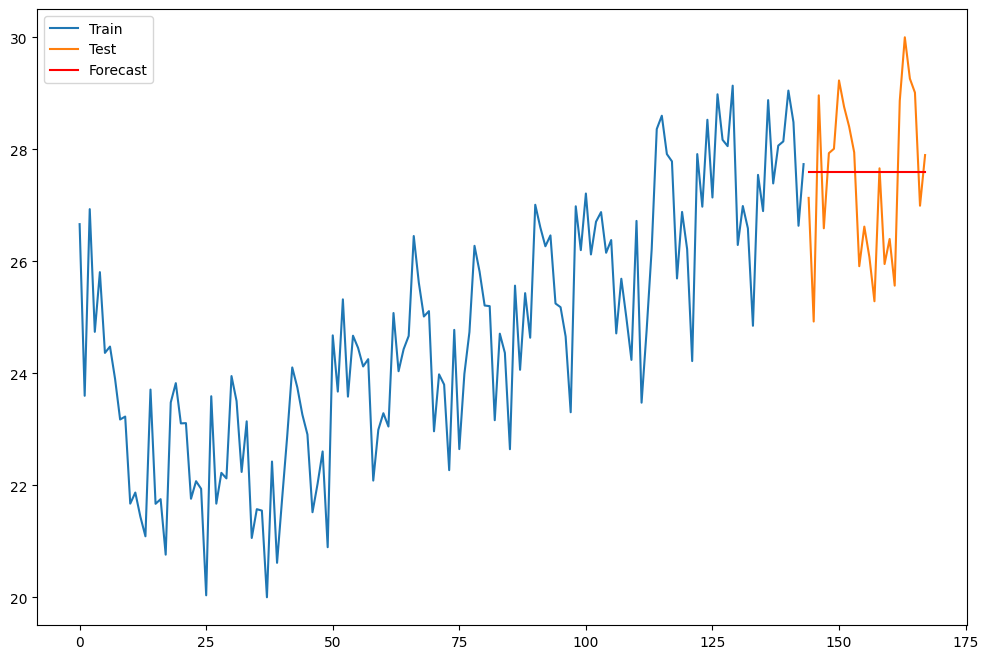

In [44]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.BirthRate,label='Train')
plt.plot(df_test.index,df_test.BirthRate,label='Test')
plt.plot(y_hat_avg.index,y_hat_avg.SES,label='Forecast',c='r')
plt.legend()

In [45]:
rms = sqrt(mean_squared_error(df_test.BirthRate, y_hat_avg.SES))
rms

1.4086237555629835

**HOLD'S LINEAR TREND METHOD**:

This is only based on the trend, not the seasonal component.
Do not use this when seasonal variation is present.
Here, we're just ignoring seasonal variation just for learning purpose.


In [46]:
mod2 = Holt(np.asarray(df_train.BirthRate)).fit(smoothing_level=0.6)


In [47]:
y_hat_avg['HoltLinear'] = mod2.forecast(len(df_test))

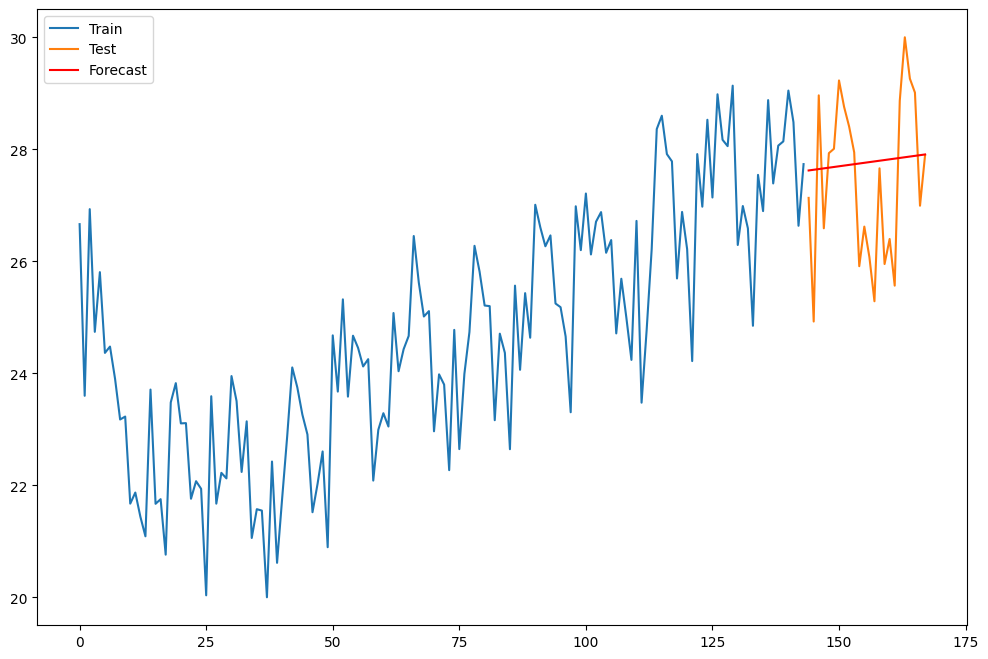

In [48]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.BirthRate,label='Train')
plt.plot(df_test.index,df_test.BirthRate,label='Test')
plt.plot(y_hat_avg.index,y_hat_avg.HoltLinear,label='Forecast',c='r')
plt.legend()

In [49]:
rms = sqrt(mean_squared_error(df_test.BirthRate, y_hat_avg.HoltLinear))
rms

1.4238880670306986

**HOLT-WINTER'S METHOD:**



In [50]:
mod3 = ExponentialSmoothing(np.asarray(df_train.BirthRate),seasonal_periods = 12).fit()


In [51]:
y_hat_avg['HoltWinter'] = mod3.forecast(len(df_test))

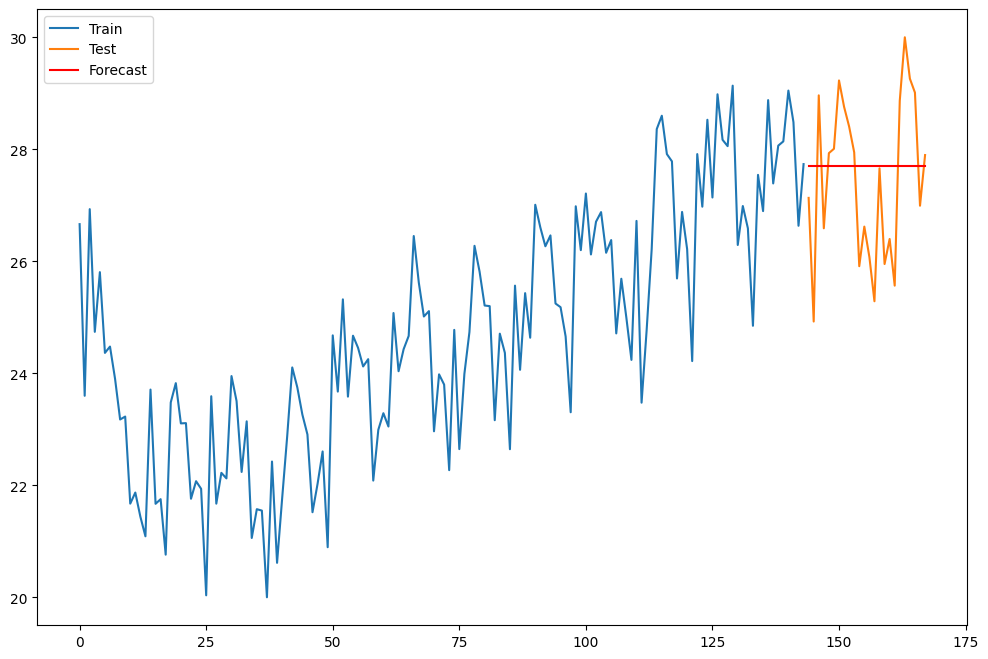

In [52]:
plt.figure(figsize=(12,8))
plt.plot(df_train.index,df_train.BirthRate,label='Train')
plt.plot(df_test.index,df_test.BirthRate,label='Test')
plt.plot(y_hat_avg.index,y_hat_avg.HoltWinter,label='Forecast',c='r')
plt.legend()

In [53]:
rms = sqrt(mean_squared_error(df_test.BirthRate, y_hat_avg.HoltWinter))
rms

1.4207643427210714

**AREMA**

In arema model, we are gong to have 3 numbers that have to be calculated.

in the sequence p,d,q is to be calculated

we need to figure out p,d,q before making predictions.

d= level of differencing.

**what is differencing?**

-> there is something called as stationary time series.

--> **in stationary time series, mean and std dev are constant.**

eg: rainfall every year is stationary time series.


**AREMA can be used only if the time series is stationary.**

Read your notes for clear understanding.

**AD FULLER TEST:**

--> AD Fuller test is used to check the stationarity of a time series.

--> H0: the time series is not stationary
--> HA : THE time series is stationary

In [56]:
from statsmodels.tsa.stattools import adfuller

In [57]:
adfuller(df_train)

(0.2017160479163269,
 0.9723576777571017,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 322.55907506392055)

Here, since the p-value (0.972) is morethan 0.05. So we do not reject H0.

In [58]:
#AFTER first level of differencing

adfuller(df_train.diff().dropna())

# dropna() gives you the df_train without missing values

(-4.253904918858687,
 0.0005333378978881231,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 314.64706729275866)

here p<0.05, H0 is rejected. So the time series is stationary.

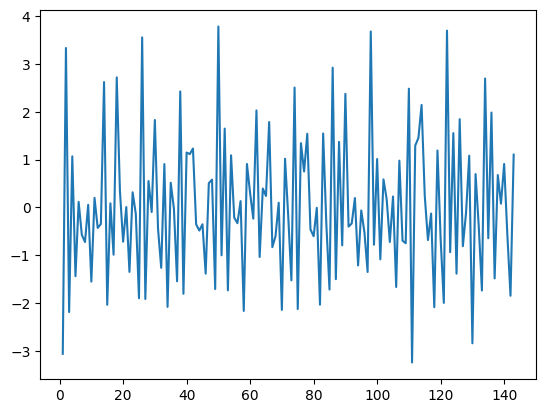

In [59]:
plt.plot(df_train.diff())

#in the below graph, the time series is stationary

we got the stationary time series in the 1st differencing only, but if you are not satisfied with that one, you can go for the second differencing.

In [60]:
#for checking do we have 2nd level of differencing,
#we got the stationary time series in the 1st differencing only, but if you are not
# satisfied with that one, you can gofor the second differencing.

adfuller(df_train.diff().diff().dropna())

(-7.414679804135267,
 6.985733866859221e-11,
 14,
 127,
 {'1%': -3.482920063655088,
  '5%': -2.884580323367261,
  '10%': -2.5790575441750883},
 329.7642316985588)

here p<0.05, H0 is rejected. Time series is stationary.

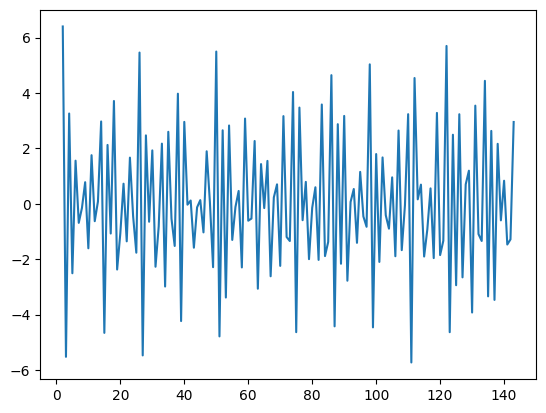

In [61]:
plt.plot(df_train.diff().diff())

**ACF(Auto correlation factor) plot and PACF (Partial Auto corelation factor)**:

for finding p and q values, we use

**ACF(Auto correlation factor) plot for finding q**,

**PACF (Partial Auto corelation factor) for finding p**

In [62]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

**ACF Plot:**

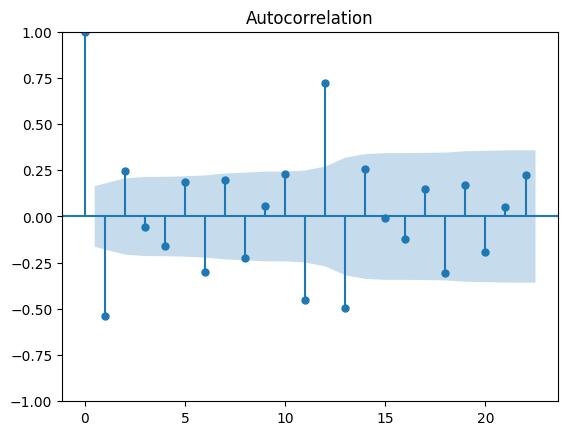

<Figure size 1200x800 with 0 Axes>

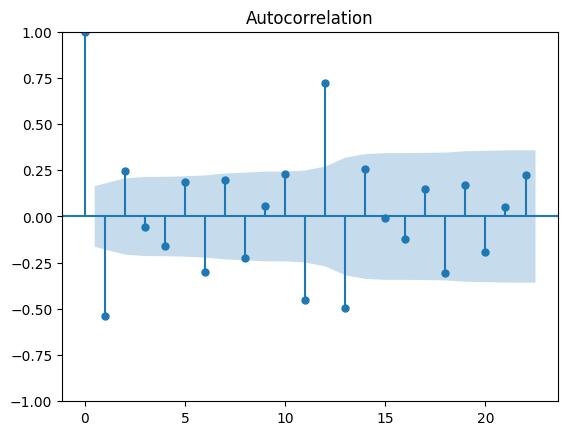

In [63]:
#finding ACF plot of df_train after 1st level of differencing, because our timeseries is becoming stationary after 1st differencing


plt.figure(figsize=(12,8))
plot_acf(df_train.diff().dropna())

#here from the graph, q value =1

**PACF Plot:**

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


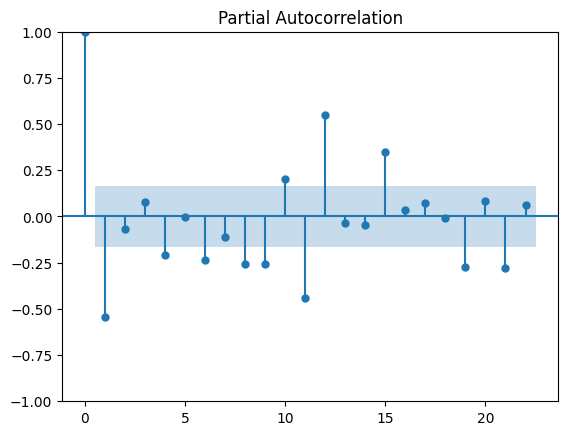

<Figure size 1200x800 with 0 Axes>

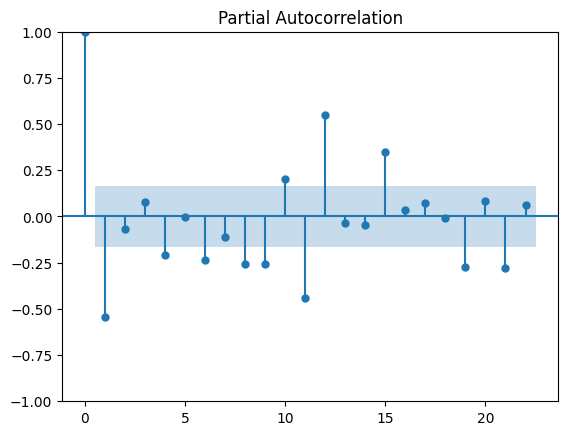

In [64]:
plt.figure(figsize=(12,8))
plot_pacf(df_train.diff().dropna())

#from the PACF plot p = 1

ON the whole,

d =1,

p=1(from PACF graph ),

q = 2(From ACF graph)

In [65]:
from statsmodels.tsa.arima.model import ARIMA

In [66]:
mod4 = ARIMA(df_train, order = (1,1,2)).fit()

# here order(p,d,q)

In [70]:
pred = mod4.forecast(len(df_test))

In [71]:
pred

144    27.085927
145    27.375486
146    27.246825
147    27.303994
148    27.278592
149    27.289879
150    27.284863
151    27.287092
152    27.286102
153    27.286542
154    27.286346
155    27.286433
156    27.286394
157    27.286412
158    27.286404
159    27.286407
160    27.286406
161    27.286406
162    27.286406
163    27.286406
164    27.286406
165    27.286406
166    27.286406
167    27.286406
Name: predicted_mean, dtype: float64

In [72]:
rms = sqrt(mean_squared_error(df_test.BirthRate, pred))
rms

1.4246485373173032